### 1. Importation des bibliothèques

In [2]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

# Ignorer les avertissements
import warnings
warnings.filterwarnings('ignore')

# Délimiteur
DELIMITER = "--------------------------------"

### 2. Chargement des données

In [3]:
# Chargement des données
path = "../data/"
employees_survey = pd.read_csv(path + "employee_survey_data.csv")
general_data = pd.read_csv(path + "general_data.csv")
in_time = pd.read_csv(path + "in_time.csv")
out_time = pd.read_csv(path + "out_time.csv")
manager_survey = pd.read_csv(path + "manager_survey_data.csv")

### 3. EDA pour le dataset employees_survey

#### 3.1. Lecture du dataset


In [13]:
# Affichage des 5 premières lignes du dataset
print(employees_survey.head())
# Affichage des 5 dernières lignes du dataset
print(employees_survey.tail())

   EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0


#### 3.2. Analyse des données


In [18]:
# Forme du dataset
print(f"Forme du dataset : {employees_survey.shape} (lignes, colonnes)")
print(DELIMITER)

# Liste des colonnes du dataset
print(f"Liste des colonnes du dataset : {employees_survey.columns.tolist()}")
print(DELIMITER)

# Affichage du type de chaque colonne
print(employees_survey.dtypes)
print(DELIMITER)

# Informations de base
print("Informations de base :")
employees_survey.info()
print(DELIMITER)

# Sommaire des statistiques
print("Sommaire des statistiques :")
print(employees_survey.describe())

Forme du dataset : (4410, 4) (lignes, colonnes)
--------------------------------
Liste des colonnes du dataset : ['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
--------------------------------
EmployeeID                   int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
dtype: object
--------------------------------
Informations de base :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB
--------------------------------
Sommaire des statistiques :
        EmployeeID  E

#### 3.3. Détection des valeurs manquantes


In [18]:
# Nombre de valeurs nulles par colonnes
print(employees_survey.isnull().sum())

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64


#### 3.4. Détection des valeurs dupliquées


In [21]:
print(f"Nombre de valeurs dupliquées : {employees_survey.duplicated().sum()}")

Nombre de valeurs dupliquées : 0


#### 3.5. Analyse univariée


##### 3.5.1. Colonnes numériques

Identification des colonnes numériques

In [10]:
numerical_columns = employees_survey.select_dtypes(include=['int64', 'float64']).columns
# Comme la colonne EmployeeID est juste une liste d'ID, elle n'est pas pertinente pour l'analyse
numerical_columns = numerical_columns.drop('EmployeeID')
print(f"Colonnes numériques : {numerical_columns.tolist()}")

Colonnes numériques : ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']


Histogrammes

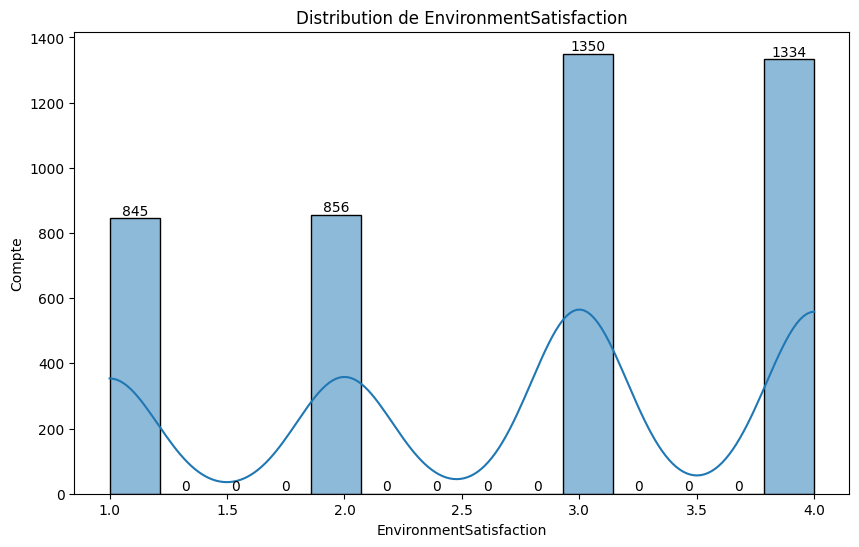

--------------------------------


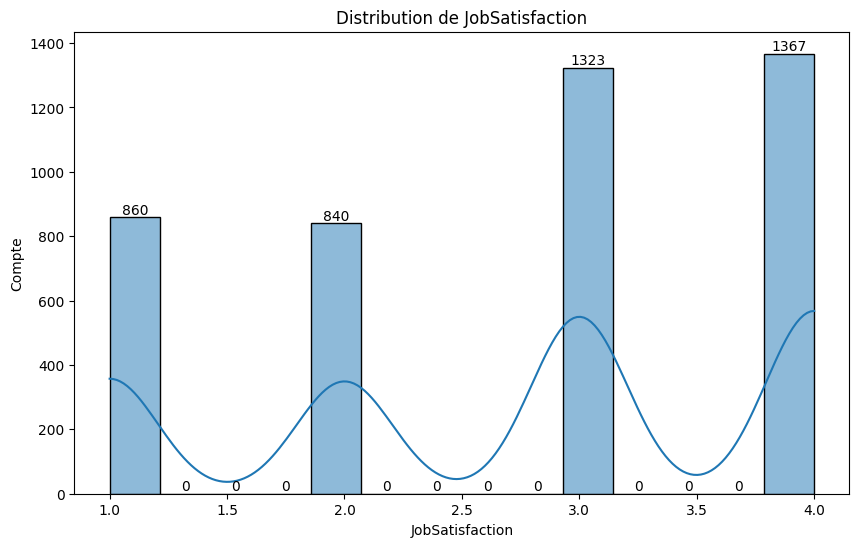

--------------------------------


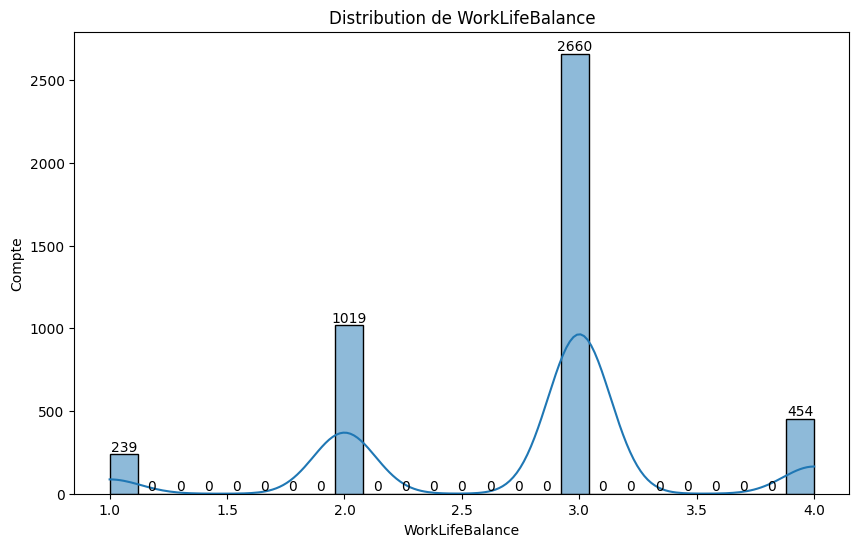

--------------------------------


In [14]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(employees_survey[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Compte')

    # Ajouter les valeurs sur le graphe
    for i in ax.containers:
        ax.bar_label(i)

    plt.show()
    print(DELIMITER)

Diagrammes à barre

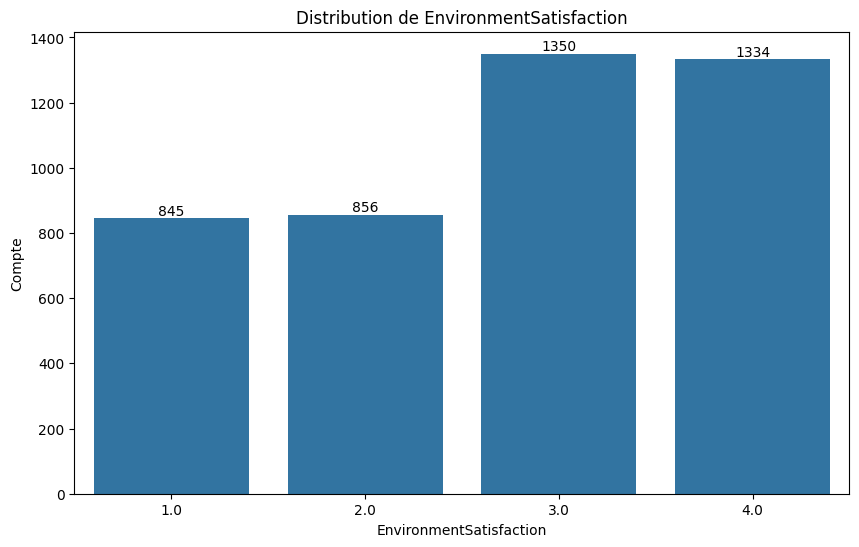

--------------------------------


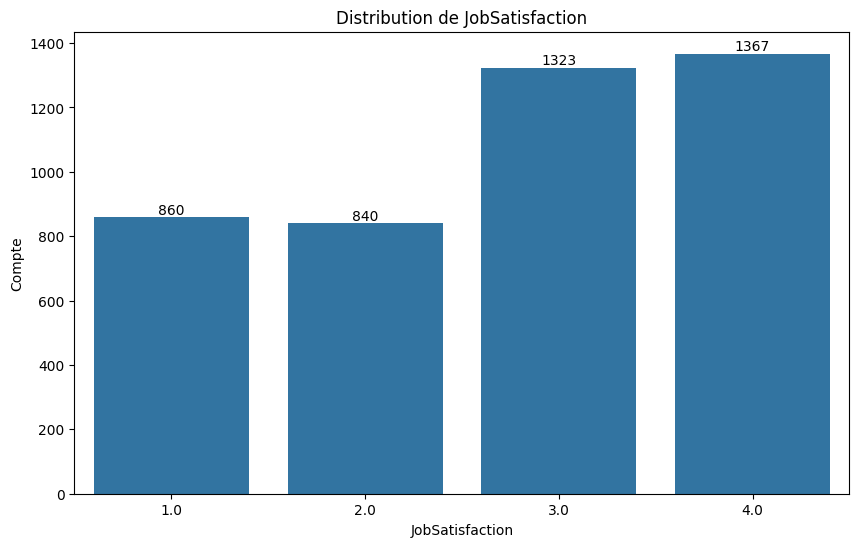

--------------------------------


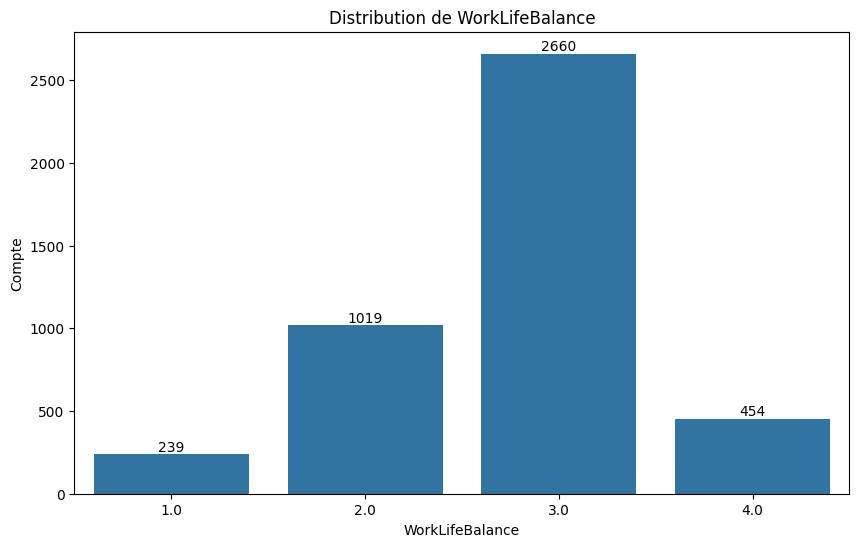

--------------------------------


In [13]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=employees_survey)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Compte')

    # Ajouter les valeurs sur le graphe
    for i in ax.containers:
        ax.bar_label(i)

    plt.show()
    print(DELIMITER)

Boxplots

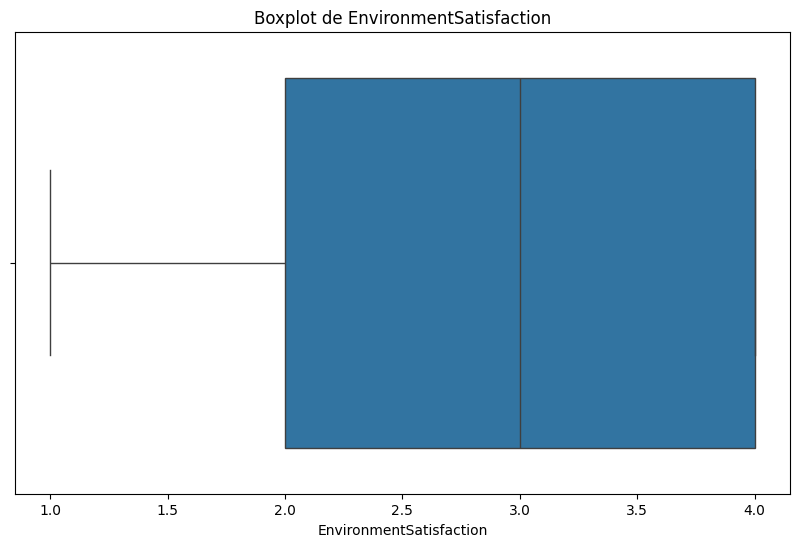

--------------------------------


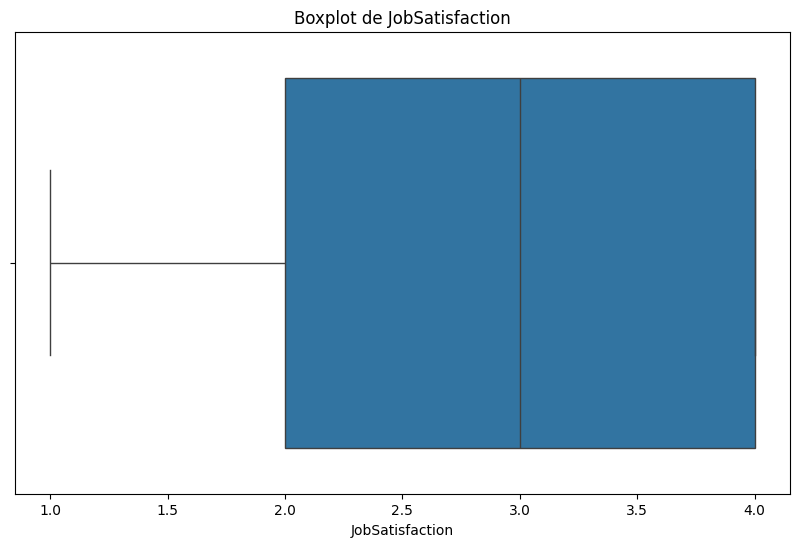

--------------------------------


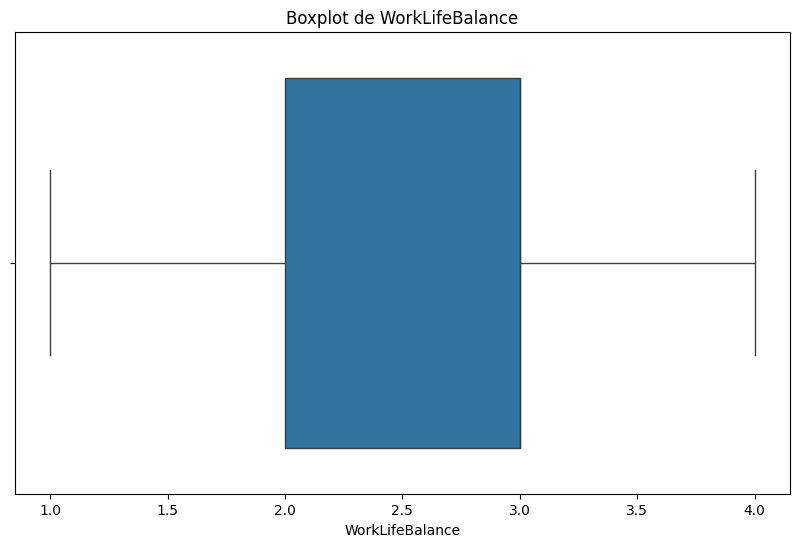

--------------------------------


In [17]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, data=employees_survey)
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()
    print(DELIMITER)

In [25]:
# Identification des colonnes catégoriques
categorical_columns = employees_survey.select_dtypes(include=['object']).columns
print(f"Colonnes catégoriques : {categorical_columns.tolist()}")
print(DELIMITER)

# Analyse univariée pour les colonnes catégoriques
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=employees_survey)
    plt.title(f'Distribution de {column}')
    plt.xlabel('Fréquence')
    plt.ylabel(column)
    plt.show()
    print(DELIMITER)


Colonnes catégoriques : []
--------------------------------


In [ ]:
# Dataset : manager_survey

# Informations de base
print(manager_survey.info())
print(DELIMITER)

# 5 premières lignes du dataset
print(manager_survey.head())
print(DELIMITER)

# Sommaire des statistiques
print(manager_survey.describe())
print(DELIMITER)

# Nombre de valeurs nulles par colonnes
print(manager_survey.isnull().sum())
print(DELIMITER)

# Nombre de valeurs dupliquées
print(manager_survey.duplicated().sum())
print(DELIMITER)


On observe grâce au code de la cellule précédente qu'il ne manque aucune valeur dans le dataset.


In [ ]:
# Dataset : general_data

# Informations de base
print(general_data.info())
print(DELIMITER)

# 5 premières lignes du dataset
print(general_data.head())
print(DELIMITER)

# Sommaire des statistiques
print(general_data.describe())
print(DELIMITER)

# Nombre de valeurs nulles par colonnes
print(general_data.isnull().sum())
print(DELIMITER)

# Nombre de valeurs dupliquées
print(general_data.duplicated().sum())
print(DELIMITER)

On observe grâce au code de la cellule précédente qu'il manque 19 valeurs dans le dataset pour la colonne `NumCompaniesWorked`. Il faudra donc faire le choix entre supprimer les lignes ou les remplacer par la valeur moyenne de la colonne.


In [ ]:
# Dataset : in_time

# Informations de base
print(in_time.info())
print(DELIMITER)

# 5 premières lignes du dataset
print(in_time.head())
print(DELIMITER)

# Sommaire des statistiques
print(in_time.describe())
print(DELIMITER)

# Nombre de valeurs nulles par colonnes
print(in_time.isnull().sum())
print(DELIMITER)

# Nombre de valeurs dupliquées
print(in_time.duplicated().sum())
print(DELIMITER)